# Memory Access Pattern

## 0. Memory Access Pattern - Uniform

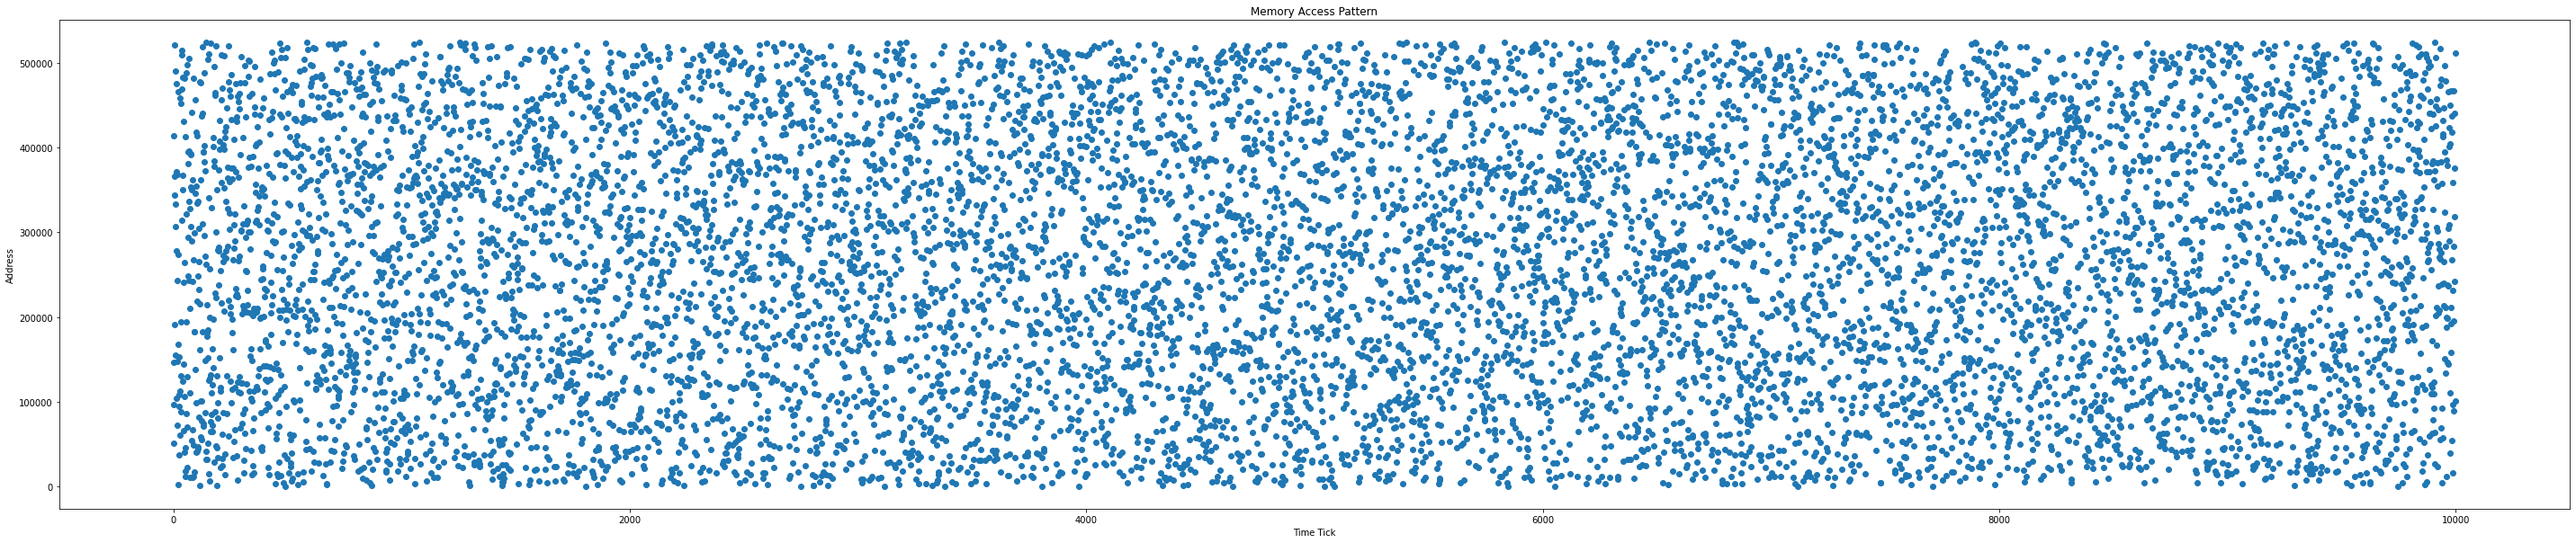

In [5]:
import numpy as np
import matplotlib.pyplot as plt


access_pattern = np.arange(0x0, 0x80000)
np.random.shuffle(access_pattern)

x = np.arange(0, int(10000))
plt.subplots(figsize=(50, 10))
plt.scatter(x, access_pattern[:int(10000)])
plt.title("Memory Access Pattern")
plt.xlabel('Time Tick')
plt.ylabel('Address')

f = open("access_pattern_uniform.txt", "a+")
for address in access_pattern:
    f.write(str(int(address)) + '\n')
f.close()

## 1. Allocate the Memory Access Density to each Memory Area

[4.10000e+02 2.15000e+02 5.77000e+02 ... 1.86382e+05 2.85057e+05
 7.46960e+04]


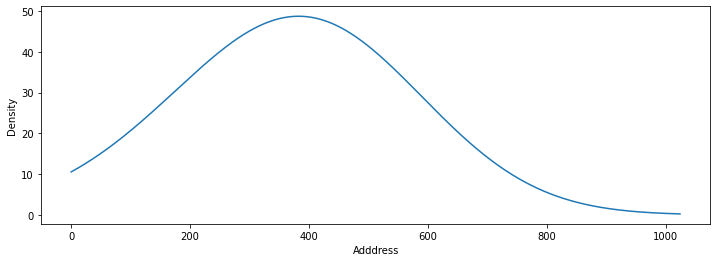

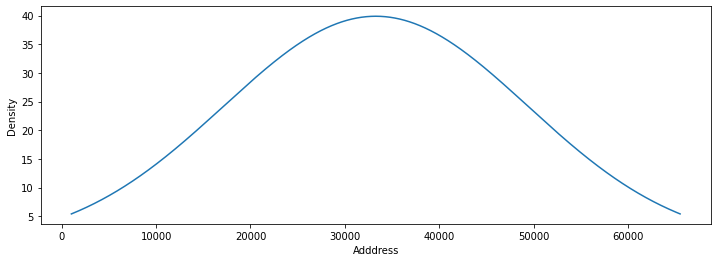

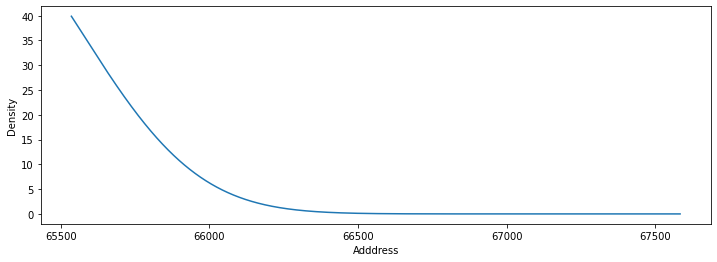

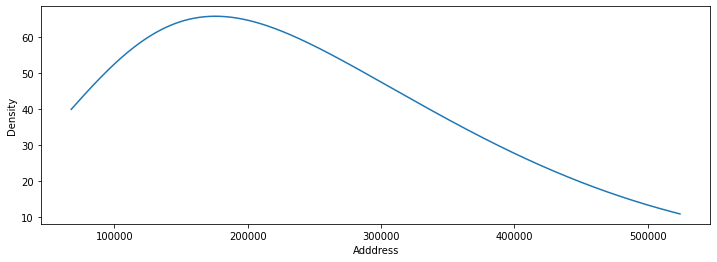

In [6]:
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def skew_norm_pdf(x,e=0,w=1,a=0):
    t = (x-e) / w
    return 2.0 * w * stats.norm.pdf(t) * stats.norm.cdf(a*t)


location = 0.0
scale = 1.0

access_pattern = []

# Reserved
x = np.linspace(-2, 2, 0x400 - 0x0) 
plt.subplots(figsize=(12,4))
p = skew_norm_pdf(x,location,scale,-1)
plt.plot(np.linspace(0x0, 0x400, 0x400 - 0x0), p * 100)

temp = []
tx = np.linspace(0x0, 0x400, 0x400 - 0x0)
for i in range(1, 0x400 - 0x0):
    temp.append([int(tx[i]) for j in range(int(p[i]*100))])
temp = np.array(np.concatenate(temp).tolist())
random.shuffle(temp)
access_pattern.append(temp[:500])
plt.xlabel('Adddress')
plt.ylabel('Density')


# Text
x = np.linspace(-2, 2, 0x10000 - 0x400) 
plt.subplots(figsize=(12,4))
p = skew_norm_pdf(x,location,scale,0)
plt.plot(np.linspace(0x400, 0x10000, 0x10000 - 0x400),p * 100)

temp = []
tx = np.linspace(0x400, 0x10000, 0x10000 - 0x400)
for i in range(0x10000 - 0x400):
    temp.append([int(tx[i]) for j in range(int(p[i]*100))])
temp = np.array(np.concatenate(temp).tolist())
random.shuffle(temp)
access_pattern.append(temp[:3500])
plt.xlabel('Adddress')
plt.ylabel('Density')


# Static
x = np.linspace(0, 2, 0x10800 -  0x10000) 
plt.subplots(figsize=(12,4))
p = skew_norm_pdf(x,location,scale,-3)
plt.plot(np.linspace(0x10000, 0x10800, 0x10800 -  0x10000),p * 100)

temp = []
tx = np.linspace(0x10000, 0x10800, 0x10800 -  0x10000)
for i in range(0x10800 -  0x10000):
    temp.append([int(tx[i]) for j in range(int(p[i]*100))])
temp = np.array(np.concatenate(temp).tolist())
random.shuffle(temp)
access_pattern.append(temp[:1000])
plt.xlabel('Adddress')
plt.ylabel('Density')


# Stack
x = np.linspace(0, 2, 0x80000 - 0x10800) 
plt.subplots(figsize=(12,4))
p = skew_norm_pdf(x,location,scale,3)
plt.plot(np.linspace(0x10800, 0x80000, 0x80000 - 0x10800),p * 100)

temp = []
tx = np.linspace(0x10800, 0x80000, 0x80000 - 0x10800)
for i in range(0x80000 - 0x10800):
    temp.append([int(tx[i]) for j in range(int(p[i]*100))])
temp = np.array(np.concatenate(temp).tolist())
random.shuffle(temp)
access_pattern.append(temp[:5000])
plt.xlabel('Adddress')
plt.ylabel('Density')

access_pattern = np.array(np.concatenate(access_pattern).tolist())
print(access_pattern)

## 2. Shuffle the Access Pattern

In [7]:
import random


blocksize = 50
access_pattern = list(access_pattern)
blocks = [access_pattern[i:i+blocksize] for i in range(0,len(access_pattern),blocksize)]

random.shuffle(blocks)
access_pattern[:] = [b for bs in blocks for b in bs]
print(len(access_pattern))

10000


## 3. Visualize the Memory Access Pattern

Text(0, 0.5, 'Address')

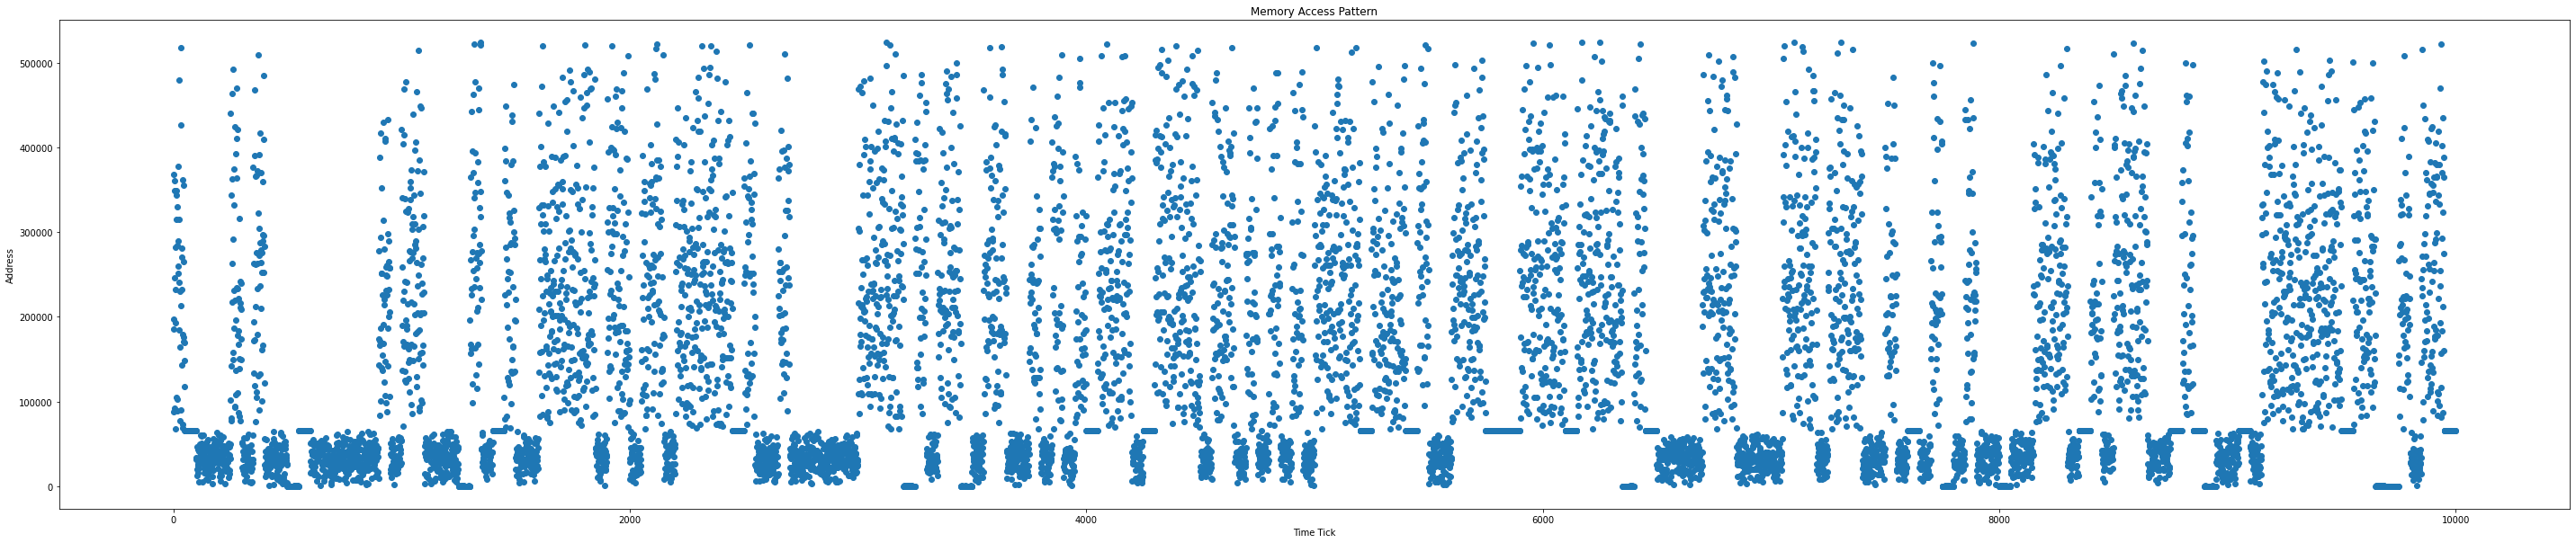

In [8]:
x = np.arange(0, int(10000))
plt.subplots(figsize=(50, 10))
plt.scatter(x, access_pattern[:int(10000)])
plt.title("Memory Access Pattern")
plt.xlabel('Time Tick')
plt.ylabel('Address')

## 4. Create the Memory Access Pattern Dump File

In [9]:
f = open("access_pattern.txt", "a+")
for address in access_pattern:
    f.write(str(int(address)) + '\n')
f.close()